In [1]:
import mysql.connector
import pandas as pd

# Add database credentials
db_config = {
    'user': 'root',
    'password': '******',
    'host': 'localhost',
    'database': 'oasis'
}

connection = mysql.connector.connect(**db_config)

In [2]:
# Database Query
query = "SELECT * FROM iris"
# query = "ALTER TABLE iris DROP Id"
df = pd.read_sql(query, connection)

# Show first few Rows of Dataframe
print(df.head(150))

# Close the connection
connection.close()

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


C:\Users\Asus\AppData\Local\Temp\ipykernel_21208\1261233756.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


In [3]:
# Analyze the dataset:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0            5.1           3.5            1.4           0.2  setosa
1            4.9           3.0            1.4           0.2  setosa
2            4.7           3.2            1.3           0.2  setosa
3            4.6           3.1            1.5           0.2  setosa
4            5.0           3.6            1.4           0.2  setosa


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


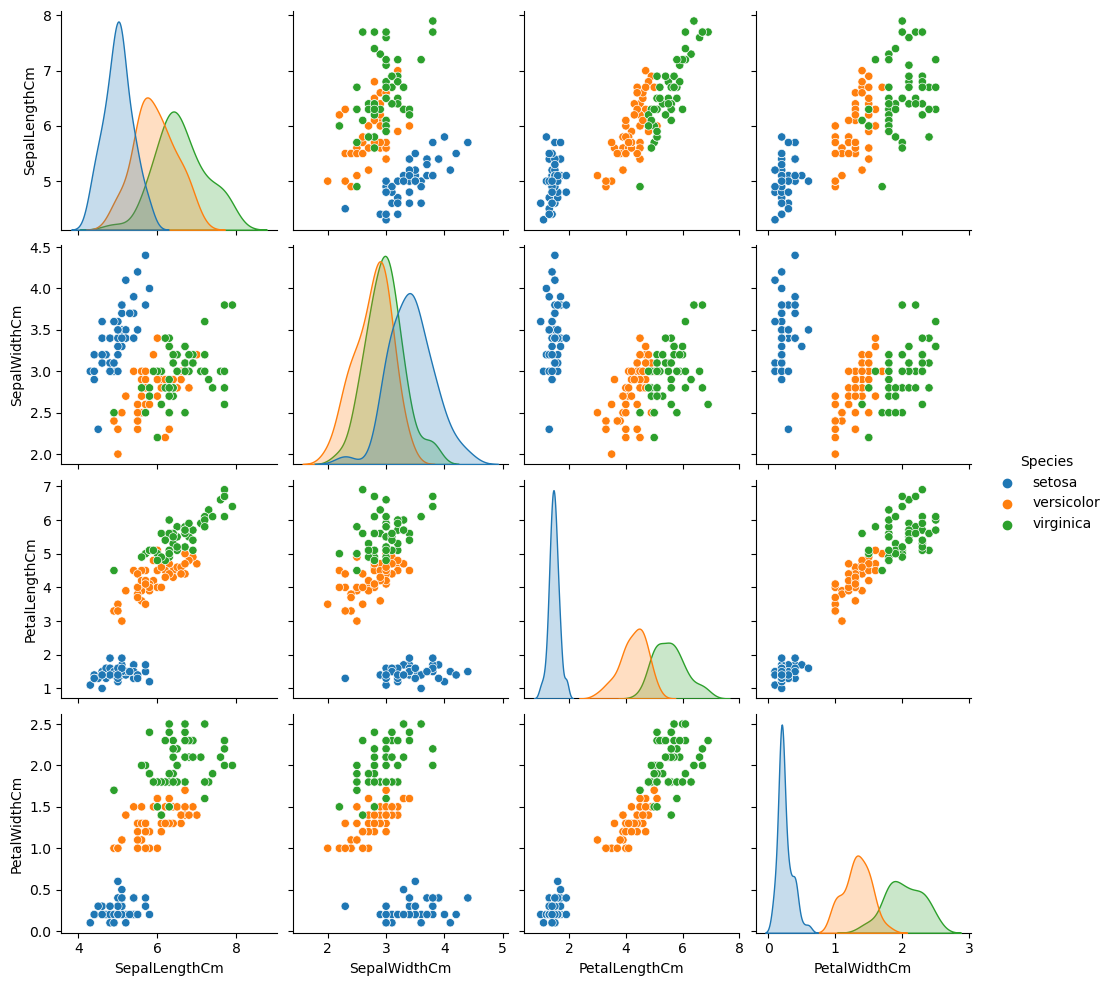

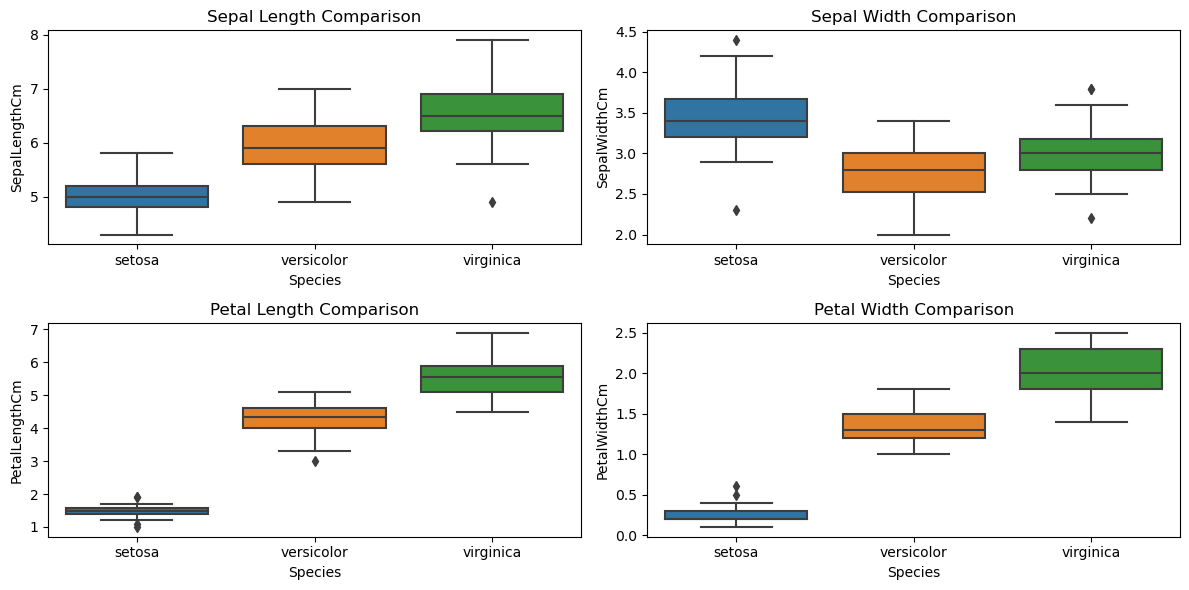

           SepalLengthCm           SepalWidthCm           PetalLengthCm  \
                    mean       std         mean       std          mean   
Species                                                                   
setosa             5.006  0.352490        3.428  0.379064         1.462   
versicolor         5.936  0.516171        2.770  0.313798         4.260   
virginica          6.588  0.635880        2.974  0.322497         5.552   

                     PetalWidthCm            
                 std         mean       std  
Species                                      
setosa      0.173664        0.246  0.105386  
versicolor  0.469911        1.326  0.197753  
virginica   0.551895        2.026  0.274650  


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset from seaborn
df = sns.load_dataset('iris')

# Rename columns to match the specified names
df.rename(columns={
    'sepal_width': 'SepalWidthCm',
    'sepal_length': 'SepalLengthCm',
    'petal_width': 'PetalWidthCm',
    'petal_length': 'PetalLengthCm',
    'species': 'Species'
}, inplace=True)

# Display the first few rows of the dataset
print(df.head())

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Species')
plt.show()

# Boxplot to compare the distributions of each feature
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Sepal Length Comparison')

plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.title('Sepal Width Comparison')

plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.title('Petal Length Comparison')

plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.title('Petal Width Comparison')

plt.tight_layout()
plt.show()

# Summary statistics
summary = df.groupby('Species').agg({
    'SepalLengthCm': ['mean', 'std'],
    'SepalWidthCm': ['mean', 'std'],
    'PetalLengthCm': ['mean', 'std'],
    'PetalWidthCm': ['mean', 'std']
})

print(summary)


In [5]:
# Do the train/test split

X= df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y= df['Species']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [6]:
# Training the Linear Regression Model

from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

model = LogisticRegression()
# model = SVC() 

# Train the model with the training set
model.fit(X_train,y_train)

LogisticRegression()

In [7]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print(f'Accuracy: {accuracy_score}')
print(accuracy_score(y_test, y_pred)*100,'%')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: <function accuracy_score at 0x000001ED7741BA60>
100.0 %
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [8]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Save the DataFrame to a CSV file
comparison_df.to_csv('iris_comparison.csv', index=False)

# Display the comparison DataFrame
print(comparison_df)

         Actual   Predicted
73   versicolor  versicolor
18       setosa      setosa
118   virginica   virginica
78   versicolor  versicolor
76   versicolor  versicolor
31       setosa      setosa
64   versicolor  versicolor
141   virginica   virginica
68   versicolor  versicolor
82   versicolor  versicolor
110   virginica   virginica
12       setosa      setosa
36       setosa      setosa
9        setosa      setosa
19       setosa      setosa
56   versicolor  versicolor
104   virginica   virginica
69   versicolor  versicolor
55   versicolor  versicolor
132   virginica   virginica
29       setosa      setosa
127   virginica   virginica
26       setosa      setosa
128   virginica   virginica
131   virginica   virginica
145   virginica   virginica
108   virginica   virginica
143   virginica   virginica
45       setosa      setosa
30       setosa      setosa


In [9]:
# Function to predict species for new input data
def predict_species(sepal_length, sepal_width, petal_length, petal_width):
    input_data = pd.DataFrame({
        'SepalLengthCm': [sepal_length],
        'SepalWidthCm': [sepal_width],
        'PetalLengthCm': [petal_length],
        'PetalWidthCm': [petal_width]
    })
    prediction = model.predict(input_data)
    return prediction[0]

# Example input values
sepal_length = float(input("Enter Sepal Length (cm): "))
sepal_width = float(input("Enter Sepal Width (cm): "))
petal_length = float(input("Enter Petal Length (cm): "))
petal_width = float(input("Enter Petal Width (cm): "))

# Predict the species
predicted_species = predict_species(sepal_length, sepal_width, petal_length, petal_width)
print(f'The predicted species is: {predicted_species}')

Enter Sepal Length (cm):  3
Enter Sepal Width (cm):  2
Enter Petal Length (cm):  4
Enter Petal Width (cm):  3


The predicted species is: virginica
